Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
데이터 갯수= 55000
Epoch: 0015 cost = 0.463145643
Learning finished
Accuracy:  0.8913
Label:  [1]
Prediction:  [1]


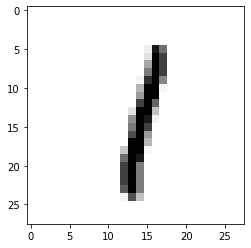

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

tf.set_random_seed(777) # for reproducibility
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True) # 자동으로 이미지를 다운로드 받는다.
nb_classes = 10 # 클래스 갯수: 숫자 이미지 파일 갯수
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784]) # 784행
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes]) # 10열
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# Test model
# arg_max(): one-hot-encoding을 만들어 주는 함수(가장 확률이 높은것을 1로, 나머지는 0으로 만듬)
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1)) # 10개의 예측값중에서 가장큰값을 구함
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # float형으로 형변환 (정확도 구함)
# parameters
training_epochs = 15
batch_size = 100 # batch_size : 큰 파일을 나눠서 읽어옴 (100개) - 메모리가 부족하기 때문에
# 55000 / 100 = 550
# epoch : 반복횟수(1번다 읽어온것)

print('데이터 갯수=', mnist.train.num_examples) # 55,000 개
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    print("Learning finished")
    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))
    # don't know why this makes Travis Build error.
    plt.imshow(
    mnist.test.images[r:r + 1].reshape(28, 28),
    cmap='Greys',
    interpolation='nearest')
    plt.show()